In [1]:
#データセットの作成
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset, TensorDataset

# ImageFolderを利用して、Datasetを作成する
# その際、ImageNetを転移学習するので、入力サイズは 224 x 224 にする。
# transforms.Compose()でtransformをまとめて一度に行う
train_images = ImageFolder("taco_and_burrito/train/", 
                            transform = transforms.Compose(
                                [transforms.RandomCrop((224, 224)), 
                                transforms.ToTensor()]
                            )
)

test_images = ImageFolder("taco_and_burrito/test/", 
                            transform = transforms.Compose(
                                [transforms.CenterCrop((224, 224)), 
                                transforms.ToTensor()]
                            )
)


In [2]:
# DataLoaderの作成
train_loader = DataLoader(
    train_images, batch_size = 32, shuffle = True
)

test_loader = DataLoader(
    test_images, batch_size = 32, shuffle = False
)

### DataLoaderの動作確認

In [3]:
print(train_images.class_to_idx)

{'burrito': 0, 'taco': 1}


- OK!!!
- これで，準備は完了

## 転移学習

In [4]:
from torchvision import models

# pre-training されたResNet18をロード
model = models.resnet18(pretrained=True)

# モデルのパラメータすべてを学習対象外にする
for param in model.parameters():
    param.requires_grad = False

In [5]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

- 最後の全結合層であるfcのみを付け替える

In [6]:
from torchvision import models
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

# 最後の全結合層を付け替える
fc_input_dim = model.fc.in_features
model.fc = nn.Linear(fc_input_dim, 2)

In [7]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

- 最後の全結合層が変わっていることを確認せよ.

In [8]:
# trainer.py ファイルからの読み込み
from trainer import trainer

In [9]:
train_acc, val_acc = trainer(model, train_loader, test_loader, epoch_num = 30)

use:  cuda:0


0it [00:00, ?it/s]

epoch1/30


23it [00:01, 12.45it/s]


1回目のepochでの訓練loss: 0.6768983683802865 訓練精度: 0.6320224719101124 検証精度 : 0.7666667103767395


2it [00:00, 14.56it/s]

epoch2/30


23it [00:01, 16.77it/s]


2回目のepochでの訓練loss: 0.553466489369219 訓練精度: 0.7570224719101124 検証精度 : 0.8000000715255737


2it [00:00, 16.41it/s]

epoch3/30


23it [00:01, 16.68it/s]


3回目のepochでの訓練loss: 0.4898726764050397 訓練精度: 0.7780898876404494 検証精度 : 0.9000000357627869


2it [00:00, 14.40it/s]

epoch4/30


23it [00:01, 15.49it/s]


4回目のepochでの訓練loss: 0.45585630292242224 訓練精度: 0.8089887640449438 検証精度 : 0.8833333849906921


2it [00:00, 16.36it/s]

epoch5/30


23it [00:01, 17.26it/s]


5回目のepochでの訓練loss: 0.409610545093363 訓練精度: 0.8525280898876404 検証精度 : 0.8333333730697632


2it [00:00, 15.39it/s]

epoch6/30


23it [00:01, 15.78it/s]


6回目のepochでの訓練loss: 0.40344618125395343 訓練精度: 0.8426966292134831 検証精度 : 0.9000000357627869


2it [00:00, 16.07it/s]

epoch7/30


23it [00:01, 17.27it/s]


7回目のepochでの訓練loss: 0.383578360080719 訓練精度: 0.8441011235955056 検証精度 : 0.8666667342185974


2it [00:00, 13.87it/s]

epoch8/30


23it [00:01, 15.87it/s]


8回目のepochでの訓練loss: 0.3953036205335097 訓練精度: 0.8230337078651685 検証精度 : 0.8833333849906921


2it [00:00, 15.39it/s]

epoch9/30


23it [00:01, 17.24it/s]


9回目のepochでの訓練loss: 0.3579747663302855 訓練精度: 0.8581460674157303 検証精度 : 0.9166666865348816


2it [00:00, 15.88it/s]

epoch10/30


23it [00:01, 17.30it/s]


10回目のepochでの訓練loss: 0.33022821288217197 訓練精度: 0.875 検証精度 : 0.8666667342185974


2it [00:00, 15.92it/s]

epoch11/30


23it [00:01, 16.98it/s]


11回目のepochでの訓練loss: 0.3273882886225527 訓練精度: 0.875 検証精度 : 0.8833333849906921


2it [00:00, 15.91it/s]

epoch12/30


23it [00:01, 16.84it/s]


12回目のepochでの訓練loss: 0.39101735773411667 訓練精度: 0.8286516853932584 検証精度 : 0.8833333849906921


2it [00:00, 15.99it/s]

epoch13/30


23it [00:01, 17.14it/s]


13回目のepochでの訓練loss: 0.3634801446036859 訓練精度: 0.8469101123595506 検証精度 : 0.8666667342185974


2it [00:00, 15.48it/s]

epoch14/30


23it [00:01, 16.81it/s]


14回目のepochでの訓練loss: 0.32638229768384586 訓練精度: 0.8707865168539326 検証精度 : 0.8000000715255737


2it [00:00, 16.56it/s]

epoch15/30


23it [00:01, 16.84it/s]


15回目のepochでの訓練loss: 0.3391435126012022 訓練精度: 0.8637640449438202 検証精度 : 0.8666667342185974


2it [00:00, 15.43it/s]

epoch16/30


23it [00:01, 17.14it/s]


16回目のepochでの訓練loss: 0.3274333138357509 訓練精度: 0.8707865168539326 検証精度 : 0.8500000238418579


2it [00:00, 16.32it/s]

epoch17/30


23it [00:01, 16.78it/s]


17回目のepochでの訓練loss: 0.30953340841965243 訓練精度: 0.8707865168539326 検証精度 : 0.8833333849906921


2it [00:00, 15.15it/s]

epoch18/30


23it [00:01, 16.92it/s]


18回目のepochでの訓練loss: 0.2960825684395703 訓練精度: 0.8665730337078652 検証精度 : 0.8833333849906921


2it [00:00, 16.02it/s]

epoch19/30


23it [00:01, 17.22it/s]


19回目のepochでの訓練loss: 0.28814614699645474 訓練精度: 0.9002808988764045 検証精度 : 0.8833333849906921


2it [00:00, 15.13it/s]

epoch20/30


23it [00:01, 16.81it/s]


20回目のepochでの訓練loss: 0.29316255247051065 訓練精度: 0.8876404494382022 検証精度 : 0.8666667342185974


2it [00:00, 15.88it/s]

epoch21/30


23it [00:01, 17.28it/s]


21回目のepochでの訓練loss: 0.3153879459608685 訓練精度: 0.8707865168539326 検証精度 : 0.8666667342185974


2it [00:00, 15.05it/s]

epoch22/30


23it [00:01, 16.91it/s]


22回目のepochでの訓練loss: 0.2998728406700221 訓練精度: 0.8778089887640449 検証精度 : 0.8333333730697632


2it [00:00, 15.84it/s]

epoch23/30


23it [00:01, 16.87it/s]


23回目のepochでの訓練loss: 0.35231532190333714 訓練精度: 0.8497191011235955 検証精度 : 0.8166667222976685


2it [00:00, 16.02it/s]

epoch24/30


23it [00:01, 17.06it/s]


24回目のepochでの訓練loss: 0.28675350275906647 訓練精度: 0.8876404494382022 検証精度 : 0.8333333730697632


2it [00:00, 16.14it/s]

epoch25/30


23it [00:01, 16.94it/s]


25回目のepochでの訓練loss: 0.2847249230200594 訓練精度: 0.8918539325842697 検証精度 : 0.8666667342185974


2it [00:00, 15.87it/s]

epoch26/30


23it [00:01, 16.79it/s]


26回目のepochでの訓練loss: 0.311983239244331 訓練精度: 0.8806179775280899 検証精度 : 0.8833333849906921


2it [00:00, 15.33it/s]

epoch27/30


23it [00:01, 16.79it/s]


27回目のepochでの訓練loss: 0.2963402606546879 訓練精度: 0.8890449438202247 検証精度 : 0.8833333849906921


2it [00:00, 14.55it/s]

epoch28/30


23it [00:01, 16.59it/s]


28回目のepochでの訓練loss: 0.2562669319185344 訓練精度: 0.9143258426966292 検証精度 : 0.8833333849906921


2it [00:00, 15.34it/s]

epoch29/30


23it [00:01, 16.38it/s]


29回目のepochでの訓練loss: 0.2883681959726594 訓練精度: 0.8806179775280899 検証精度 : 0.8833333849906921


2it [00:00, 15.92it/s]

epoch30/30


23it [00:01, 16.75it/s]


30回目のepochでの訓練loss: 0.27970662916248495 訓練精度: 0.8735955056179775 検証精度 : 0.8833333849906921


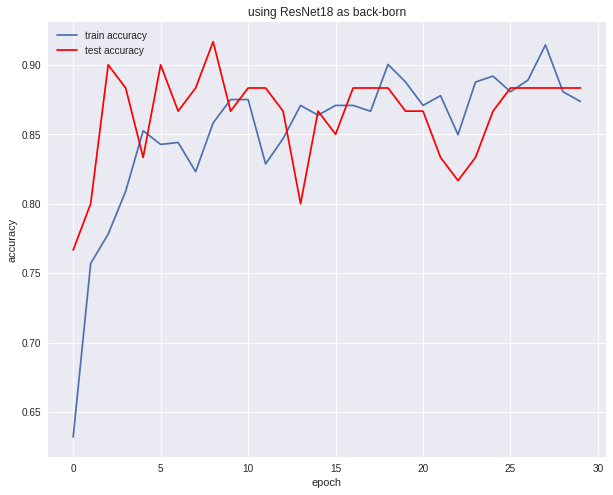

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
%matplotlib inline

plt.figure(figsize = (10, 8))
plt.plot(train_acc, label = "train accuracy")
plt.plot(val_acc, label = "test accuracy", color = "red")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.title("using ResNet18 as back-born")
plt.show()